# <center>Physiological Signals Processing</center>
## <center>CHALLENGE</center>
#### <center>Pablo Crespo Darriba, Irene Torrijos Robles and Paula Yago Esparza</center>

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as sg
import sensormotion as sm


## 1. Extract the Data and Analyse the signals

Read the data from the Training.csv file and the category each data belongs to.

In [2]:
df=pd.read_csv('./Training.csv')
cat=list(df["Category"])

In [3]:
ci=[]

# Collect the data of the "Cadera izquierda"
directory = 'Data/Training/'
for car in range(1,len(os.listdir(directory))):
    CI=list()
    directorio=directory+str(car)+"/"
    f = open(directorio+'CI.txt')
    CI1 = f.readlines()[1:]
    for i in range(len(CI1)):

        CI1[i]=CI1[i].replace("\n","").split()
        CI.append(np.array([float(CI1[i][0]),float(CI1[i][1]),float(CI1[i][2])]))


    ci.append(np.array(CI))

# Collect the data of the "Pie Derecho"    
pd=[]

directory = 'Data/Training/'
for car in range(1,len(os.listdir(directory))):
    PD=[]
    directorio=directory+str(car)+"/"
    f = open(directorio+'PD.txt')
    PD1 = f.readlines()[1:]
    for i in range(len(PD1)):

        PD1[i]=PD1[i].replace("\n","").split()
        PD.append(np.array([float(PD1[i][0]),float(PD1[i][1]),float(PD1[i][2])]))


    pd.append(np.array(PD))
#Array with the "Cadera Izquierda" signals
ci=np.array(ci)
#Array with the "Pie Derecho" signals
pd=np.array(pd)
#Array with both "Cadera Izquierda" and Pie Derecho" signals
to=np.concatenate((ci,pd))

#To reduce dimensionality, we calculate the module of each signal
tto=[]
for i in range(len(to)):
    tto.append(np.sqrt(to[i,:,0]**2 + to[i,:,1]**2 + to[i,:,2]**2))
tto=np.array(tto)

To organize the signals according to the group they belong (0,1,2), we use 'cat' which contains the 'Category' file.

Our main goal with this classification is to study each group separately in order to look for any differences. 

In [4]:
cig0=[]
cig1=[]
cig2=[]
pdg0=[]
pdg1=[]
pdg2=[]
cit=[]
pdt=[]

for i in range(len(cat)):
    
    if cat[i]==0:
        cig0.append(ci[i])
        pdg0.append(pd[i])
        
    elif cat[i]==1:
        cig1.append(ci[i])
        pdg1.append(pd[i])
        
    elif cat[i]==2:
        cig2.append(ci[i])
        pdg2.append(pd[i])
cit=np.array(cig0+cig1+cig2)
pdt=np.array(pdg0+pdg1+pdg2)
tot=np.concatenate((cit,pdt))
cig0=np.array(cig0)
cig1=np.array(cig1)
cig2=np.array(cig2)
pdg0=np.array(pdg0)
pdg1=np.array(pdg1)
pdg2=np.array(pdg2)
tott=[]
for i in range(len(tot)):
    tott.append(np.sqrt(tot[i,:,0]**2 + tot[0,:,1]**2 + tot[i,:,2]**2))
tott=np.array(tott)

Plot of a signal, taking 1000 samples. 

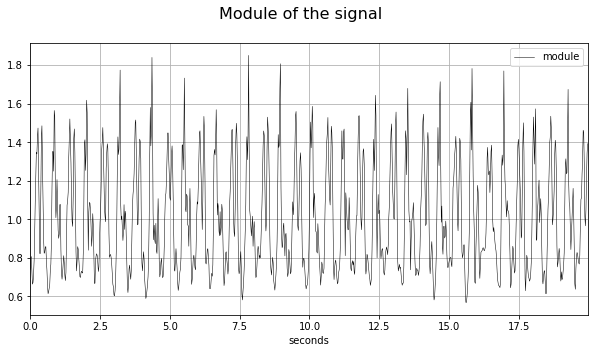

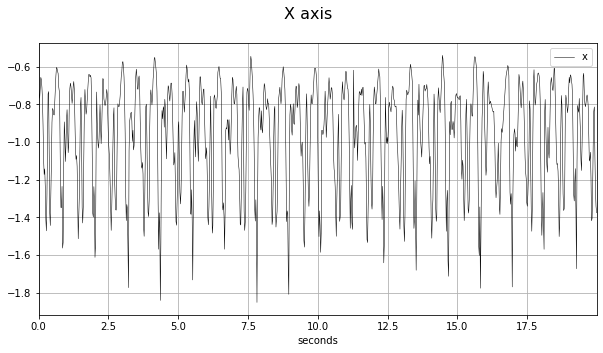

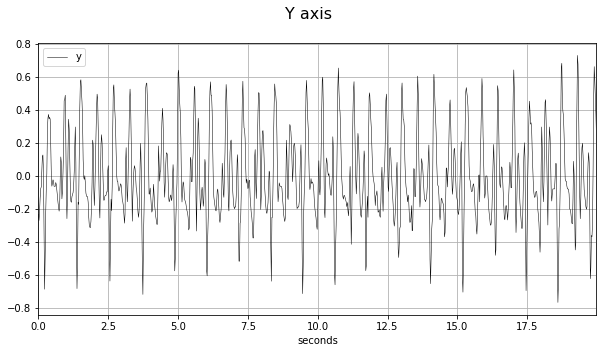

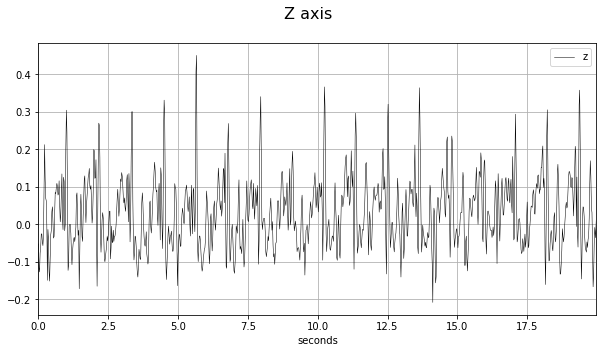

In [5]:
time = np.arange(0, 1000)/50 #in seconds
#Module of the signal
sm.plot.plot_signal(time, [{'data': tott[0,:1000], 'label': 'module', 'line_width': 0.5 }],xlab= 'seconds', title= 'Module of the signal')
# X axis
sm.plot.plot_signal(time, [{'data': tot[0,:1000,0], 'label': 'x', 'line_width': 0.5 }],  xlab= 'seconds', title= 'X axis')
# Y axis
sm.plot.plot_signal(time, [{'data': tot[0,:1000,1], 'label': 'y', 'line_width': 0.5 }], xlab= 'seconds',title= 'Y axis')
# Z axis
sm.plot.plot_signal(time, [{'data': tot[0,:1000,2], 'label': 'z', 'line_width': 0.5 }], xlab= 'seconds',title= 'Z axis')

To check some of the characteristics of the signals, we compute the periodogram and the total average power, to see if there's any difference between groups. 

In [6]:
fs = 50
avpg = []
for i in range(len(tott)):
    f, Pxx_den = sg.periodogram(tott[i], fs)
    ## Compute the total average power
    width = np.diff(f)
    pvec_total = np.multiply(width,Pxx_den[0:-1])
    avpg_total = np.sum(pvec_total)
    avpg.append(avpg_total)
    
avpg=np.array(avpg)

print('The average power is:')
print('For CI: ','\n','Group 0:',np.mean(avpg[:20]),'\n','Group 1:',np.mean(avpg[20:40]),'\n','Group 2:',np.mean(avpg[40:60]))
print('For PD: ','\n','Group 0:',np.mean(avpg[60:80]),'\n','Group 1:',np.mean(avpg[80:100]),'\n','Group 2:',np.mean(avpg[100:120]))

The average power is:
For CI:  
 Group 0: 0.09149955804830331 
 Group 1: 0.08615832056254367 
 Group 2: 0.07479334236050451
For PD:  
 Group 0: 0.31313008563768546 
 Group 1: 0.338003854625386 
 Group 2: 0.3232585741619687


As we can see, the values for the 'Cadera Izquierda' groups are slightly more different between them, compared to the 'Pie Derecho' groups.

#### VISUALIZE FREQUENCIES IN GROUPS

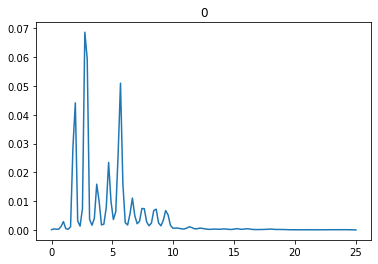

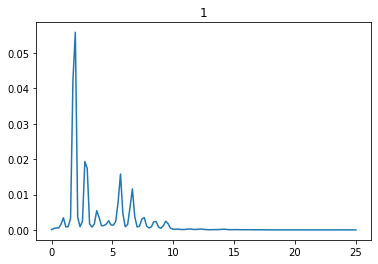

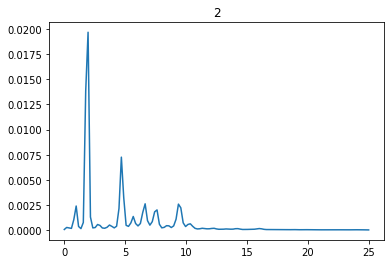

In [7]:
for i in range(3):
    señal=tot[1,:,i]
    f,P = sg.welch(señal, window='hamming', fs=50)
    plt.plot(f,P)
    plt.title(i)
    plt.show()

## 2. LOOK FOR A METHOD TO CLASSIFY SIGNALS

### 2.1.  Stability of the gait

#### Analyse the stability of the gait signal, following the process explained in Estimation of Gait Stability based on Accelerometer Signals[1] 

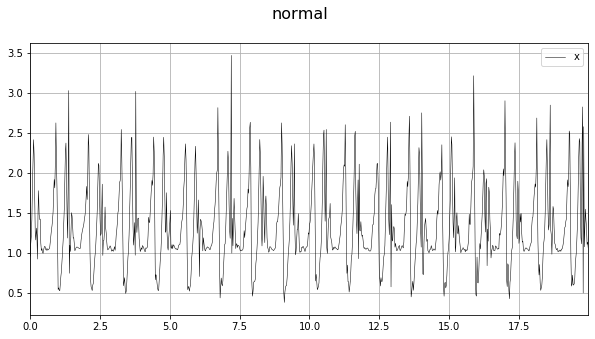

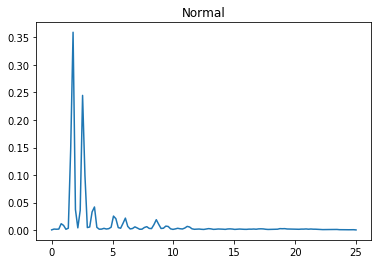

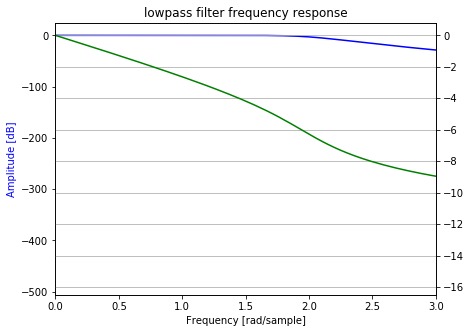

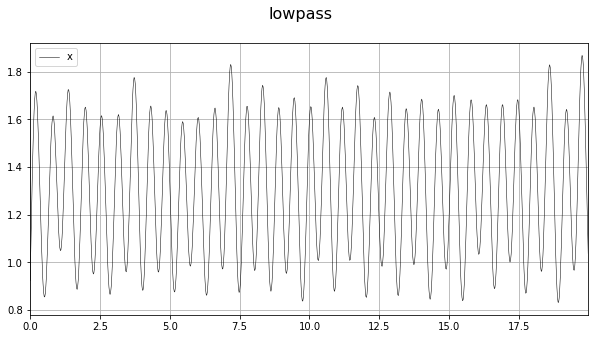

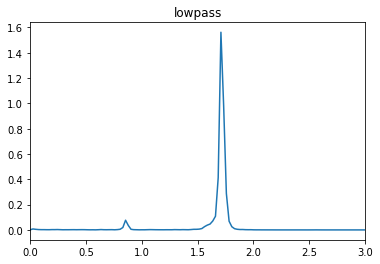

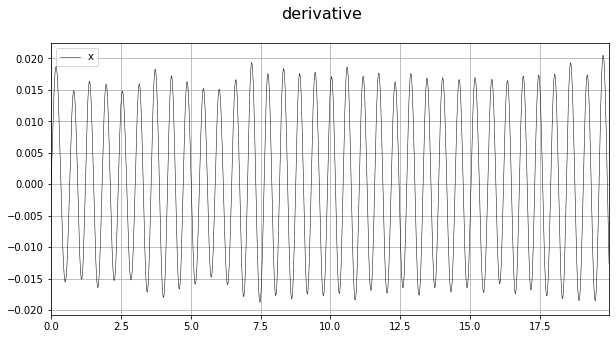

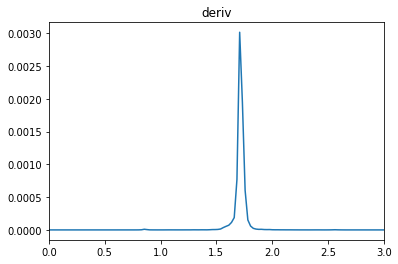

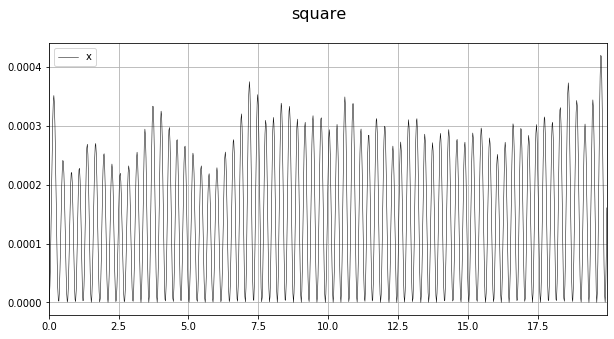

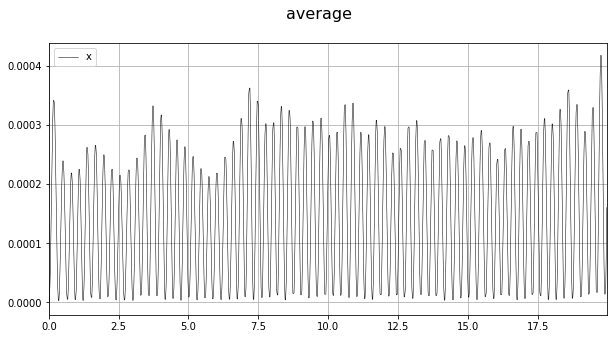

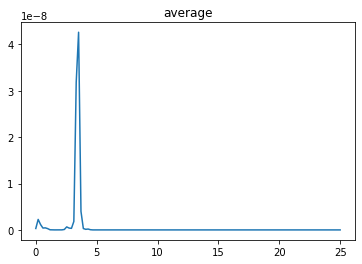

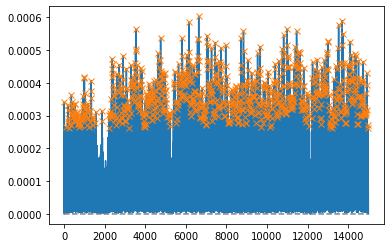

0.336981981981982

In [8]:
#VARIABILITY
time = np.arange(0, 1000)/50 #in seconds

#without filter
fs=50
señal=tott[60,:]
sm.plot.plot_signal(time, [{'data': señal[:1000], 'label': 'x', 'line_width': 0.5 }], title= 'normal')

f,Pp = sg.welch(señal, window='hamming', fs=50)
plt.plot(f,Pp)
plt.title('Normal')
plt.show()

#lowpass
b_, a_ = sg.butter(8, Wn =2/25, btype='lowpass')

w_IIR, h_IIR = sg.freqz(b_, a_, fs=50)

plt.figure(figsize=[15,5])
ax1 = plt.subplot(121)
ax1.set_title('lowpass filter frequency response')
ax1.plot(w_IIR, 20 * np.log10(abs(h_IIR)), 'b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_IIR))
ax2.plot(w_IIR, angles, 'g')
ax2.grid()
ax2.axis('tight')
plt.xlim((0,3))

señallp = sg.filtfilt(b_,a_,señal) 
sm.plot.plot_signal(time, [{'data': señallp[:1000], 'label': 'x', 'line_width': 0.5}], title= 'lowpass')
f_,P_ = sg.welch(señallp, window='hamming', fs=50, nperseg=2048)

plt.plot(f_,P_)
plt.title('lowpass')
plt.xlim(0,3)
plt.show()

#derivative filter

a = 1
b = 1/10*np.array([2,1,0,-1,-2])

w, h = sg.freqz(b,a, worN =2056*20,fs = fs)

señald = sg.filtfilt(b,a,señallp)

sm.plot.plot_signal(time, [{'data': señald[:1000], 'label': 'x', 'line_width': 0.5}], title= 'derivative')
f_,P_ = sg.welch(señald, window='hamming', fs=50, nperseg=2048)

plt.plot(f_,P_)
plt.title('deriv')
plt.xlim(0,3)
plt.show()

#squaring

señals=señald**2

sm.plot.plot_signal(time, [{'data': señals[:1000], 'label': 'x', 'line_width': 0.5}], title= 'square')
f_,P_ = sg.welch(señals, window='hamming', fs=50, nperseg=2048)


#average
señala=sg.medfilt(señals)

sm.plot.plot_signal(time, [{'data': señala[:1000], 'label': 'x', 'line_width': 0.5}], title= 'average')

f_,P_ML_0 = sg.welch(señala, window='hamming', fs=50)
plt.plot(f_,P_ML_0)
plt.title('average')
plt.show()

#find peaks
th=np.max(señala[100:14800])/2.3
peaks, _ = sg.find_peaks(señala, height=th)
plt.plot(señala)
plt.plot(peaks, señala[peaks], "x")
plt.plot(np.zeros_like(señala), "--", color="gray")
plt.show()

npeaks=len(peaks)
tim=[]
for i in range(1,len(peaks)):
    timp=peaks[i]-peaks[i-1]
    tim.append(timp)
tim=np.array(tim)
np.mean(tim/50)

#### We discarded this method since the results obtained did not matched with reality, so we decided to change the method used.

### 2.2. JIMENEZ METHOD

#### Reading a bit about gait analysis classification methods we came through a method explained in [2]. It was based on step detection so we gave it a try.

In Jimenez method, two thresholds are defined. And for a window of samples, the variance is obtained. When the variance signal makes some conditions, a step is reported

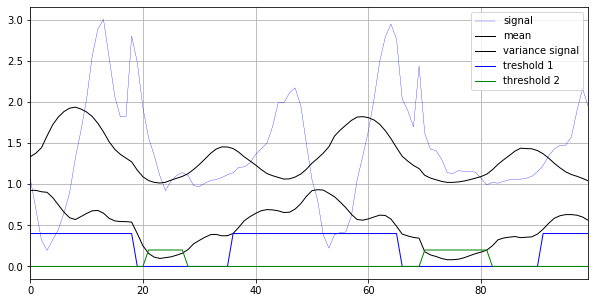

Sample at which the first 10 steps happened [ 19  66 120 174 231 279 333 387 443 497]
Time passed from one step to the next one [47, 54, 54, 57, 48, 54, 54, 56, 54, 49]


In [9]:
#JIMENEZ
señal=tott[61,:]
w=8 #8 samples
T1=0.4
T2=0.2
p=1/(2*w+1)
blist1=[]
blist2=[]
mean=[]
var=[]
step=[0]
tp=[]
for i in range(w,len(señal)):
    B1=0
    B2=0
    mq=p*sum(señal[i-w:i+w])
    vari=np.sqrt(p*sum((señal[i-w:i+w]-mq)**2))
    mean.append(mq)
    var.append(vari)
    if vari > T1:
        B1=T1
    if vari < T2:
        B2=T2
    
    if i>30 and blist1[-15]<blist1[-16] and max(blist2[-15:])==T2 and ((i-15-w)-step[-1]>20 or step[-1]==0):
        step.append(i-15-w)
        tp.append(step[-1]-step[-2])
    blist1.append(B1)
    blist2.append(B2)

tlim=100
time = np.arange(0, tlim) #in seconds
mean= np.array(mean)
blist1=np.array(blist1)
blist2=np.array(blist2)
var=np.array(var)
step=np.array(step) # SAMPLES AT WHICH A STEP IS REPORTED
tp=np.array(tp)  #THE TIME PASSED FROM ONE STEP TO THE NEXT ONE
sm.plot.plot_signal(time, [{'data': señal[:tlim],'label': 'signal','color': 'b', 'line_width': 0.3},{'data': mean[:tlim],'label': 'mean','line_Width': 0.2}, {'data': var[:tlim],'label': 'variance signal','line_Width': 2}, {'data': blist1[:tlim],'label': 'treshold 1','line_Width': 2, 'color':'b'}, {'data': blist2[:tlim],'label': 'threshold 2','line_Width': 2, 'color':'g'}])
print('Sample at which the first 10 steps happened', step[1:11]) # Samples at which the first 10 steps happened
print('Time passed from one step to the next one', list(tp[1:11]))

#### The step detector worked quite well, although many changes were made since our signals are completly different than those shown on the article. These results matched perfectly with a normal gait of a person. So we applied to every signal

In [10]:
#JIMENEZ
varl=[]
me=[]
w=8 #8 samples
T1=0.4
T2=0.2
p=1/(2*w+1)
for l in range(60):
    tp=[]
    step=[0]
    señal=tott[60+l,:]
    blist1=[]
    blist2=[]
    for i in range(w,len(señal)):
        B1=0
        B2=0
        mq=p*sum(señal[i-w:i+w])
        vari=np.sqrt(p*sum((señal[i-w:i+w]-mq)**2))
        if vari > T1:
            B1=T1
        if vari < T2:
            B2=T2

        if i>30 and blist1[-15]<blist1[-16] and max(blist2[-15:])==T2 and ((i-15-w)-step[-1]>20 or step[-1]==0):
            step.append(i-15-w)
            tp.append(step[-1]-step[-2])

        blist1.append(B1)
        blist2.append(B2)
    tp = np.array(tp)
    tp = np.delete(tp, np.argwhere(tp > 75))
    tp = tp[1:]
    varl.append(np.var(tp))
    me.append(np.mean(tp))
print('variance in groups:', np.mean(varl[:20]),np.mean(varl[20:40]),np.mean(varl[40:60]))
print('mean in groups:', np.mean(me[:20]),np.mean(me[20:40]),np.mean(me[40:60]))

variance in groups: 19.22445702710067 19.465161594183606 13.120135763935465
mean in groups: 54.08384031551909 54.32600138901207 55.88113808386034


#### When applied to every signal, we could see no evidence to classificate properly the groups, neither in the mean time difference between steps nor in the variance between this time. So we discarded this method too

### 2.3. REGULARITY INDEX with ACF

#### The next trial was to compute parameters as regularity index and periodicity from the method proposed in [3] and [4]. This is, using the Autocorrelation Function. 

In [11]:
def autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

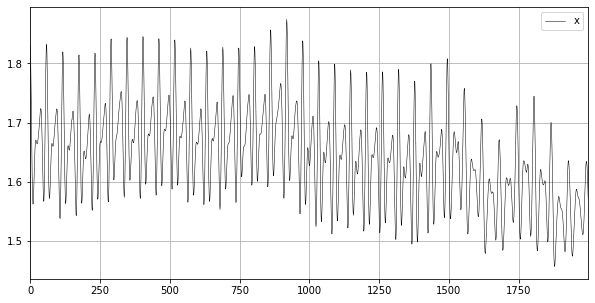

In [12]:
#RI
import matplotlib.pyplot
N=150
señal=tott[60,:]
Rlist=[]
b_, a_ = sg.butter(4, Wn =5/25, btype='lowpass')
señallp = sg.filtfilt(b_,a_,señal) 

for m in range(0,10000):
    if m != 150:
        R=1/(N)*sum(señallp[m+n]*señallp[n] for n in range(N-1))
        Rlist.append(R)
    if m == 150:
        Rlist.append(Rlist[-1])

tlim=2000
time = np.arange(0, tlim) #in seconds    
sm.plot.plot_signal(time, [{'data': Rlist[:tlim], 'label': 'x', 'line_width': 0.5}])
Rlist=np.array(Rlist)
corr=autocorrelation(señallp)
plt.plot(corr[:2000])

#### Since we did not get the results we expected with the autocorrelation, this method was also discarded.

### 2.4. Fundamental Frequency, Dominant Frequency and Power



#### We could not see differences on the frequency domain between the groups just watchig at the periodogram, but we will do an spectral analysis based on [5], and try to extract useful parameters:

>**fd** = Dominant frequency  
>**f0** = Fundamental frequency  
>**ri** = Estimation of regularity index


To do this, we first compute the periodogram and obtain the maximum value which corresponds to this dominant frequency.

Then, we will apply a High Pass Filter, a rectifier and lastly a Low Pass Filter with a cut frquency of 1,75 Hz. Once we've done this, we will compute the periodogram again and obtain the fundamental frequency.

This is all based on *Full Band Spectra Analysis of Gait Acceleration Signals for Peripheral Arterial Disease Patients** [5]

#### Firstly we will apply the proposed filters to extract f0 to a single signal in order to see if they work and understand what we are generating

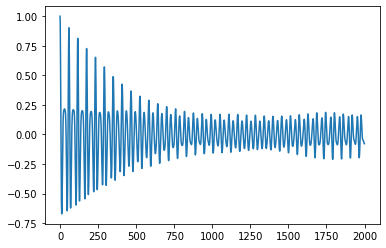

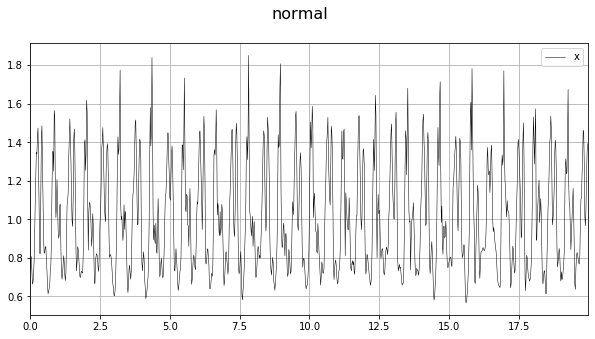

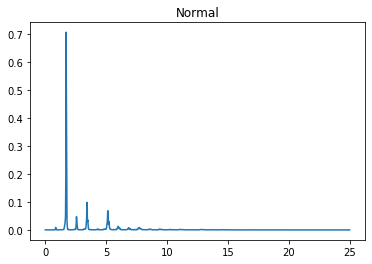

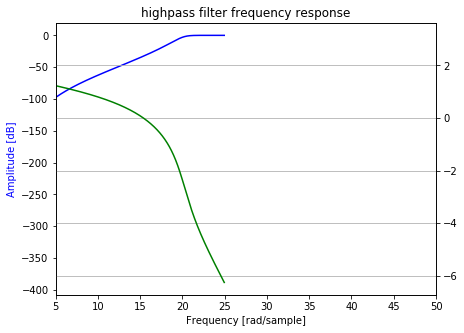

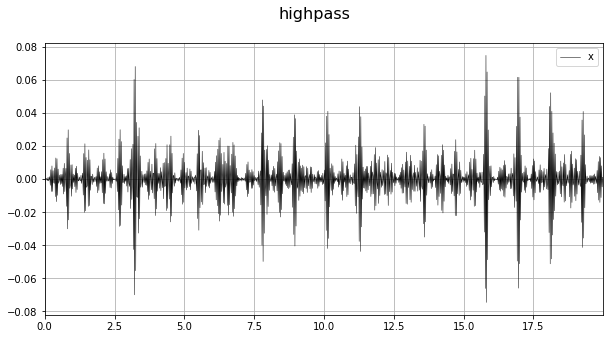

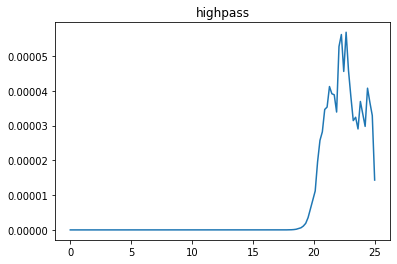

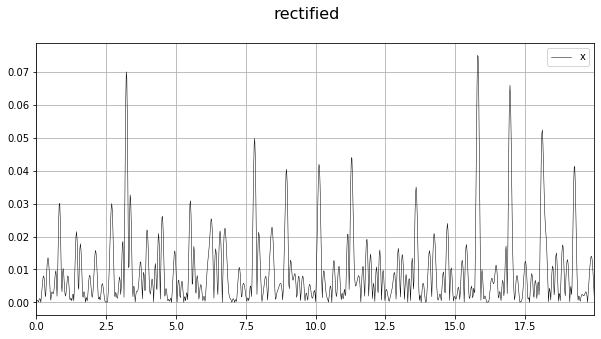

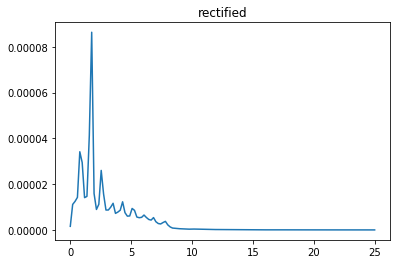

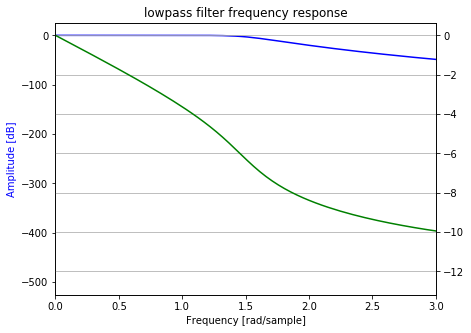

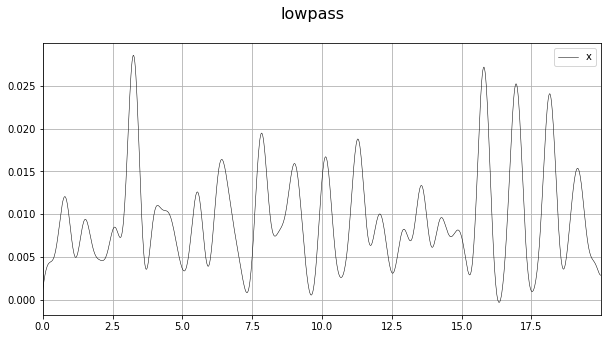

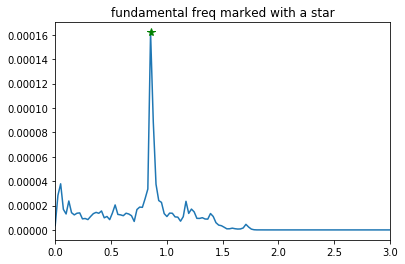

In [13]:
time = np.arange(0, 1000)/50 #in seconds

#without filter
señal=tott[0,:]
sm.plot.plot_signal(time, [{'data': señal[:1000], 'label': 'x', 'line_width': 0.5 }], title= 'normal')

f,Pp = sg.welch(señal, window='hamming', fs=50, nperseg=2048)
fd=f[np.argmax(Pp)]
RI=fd/Pp[:int(1025*15/25)]



plt.plot(f,Pp)
plt.title('Normal')
plt.show()


#HIGH PASS filter
b_, a_ = sg.butter(5, Wn =20/25, btype='highpass')

w_IIR, h_IIR = sg.freqz(b_, a_, fs=50)

plt.figure(figsize=[15,5])
ax1 = plt.subplot(121)
ax1.set_title('highpass filter frequency response')
ax1.plot(w_IIR, 20 * np.log10(abs(h_IIR)), 'b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_IIR))
ax2.plot(w_IIR, angles, 'g')
ax2.grid()
ax2.axis('tight')
plt.xlim((5,50))


señalhp = sg.filtfilt(b_,a_,cig0[0,:,0]) 
sm.plot.plot_signal(time, [{'data': señalhp[:1000], 'label': 'x', 'line_width': 0.5}], title= 'highpass')


f_,P = sg.welch(señalhp, window='hamming', fs=50)
plt.plot(f_,P)
plt.title('highpass')
plt.show()


 #rectifier
señalrf=np.abs(señalhp)

sm.plot.plot_signal(time, [{'data': señalrf[:1000], 'label': 'x', 'line_width': 0.5}], title= 'rectified')

f_,P_ML_0 = sg.welch(señalrf, window='hamming', fs=50)
plt.plot(f_,P_ML_0)
plt.title('rectified')
plt.show()

#LOW PASS filter
b_, a_ = sg.butter(8, Wn =1.5/25, btype='lowpass')

w_IIR, h_IIR = sg.freqz(b_, a_, fs=50)

plt.figure(figsize=[15,5])
ax1 = plt.subplot(121)
ax1.set_title('lowpass filter frequency response')
ax1.plot(w_IIR, 20 * np.log10(abs(h_IIR)), 'b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_IIR))
ax2.plot(w_IIR, angles, 'g')
ax2.grid()
ax2.axis('tight')
plt.xlim((0,3))



señallp = sg.filtfilt(b_,a_,señalrf) 



sm.plot.plot_signal(time, [{'data': señallp[:1000], 'label': 'x', 'line_width': 0.5}], title= 'lowpass')

f_,P_ = sg.welch(señallp, window='hamming', fs=50, nperseg=2048)

xn=np.argmax(P_)
f0=f_[xn]
yn=max(P_)
plt.plot(f_,P_)
plt.plot(f0,yn,'g*',markersize=8)
plt.xlim(0,3)
plt.title('fundamental freq marked with a star')
plt.show()



Compute this on all the signals classified in groups to observe differences

In [14]:
f0g0=[]
f0g1=[]
f0g2=[]
f0t=[]
powerg0=[]
powerg1=[]
powerg2=[]
fd0=[]
fd1=[]
fd2=[]
P0=[]
P1=[]
P2=[]
powert=[]
Rlist=[]
for l in range(len(tott)): 
        señal=tott[l,:]
        #Compute the periodogram 
        pd,Pt = sg.welch(señal, window='hamming', fs=50,nperseg=2048)
        #Obtain the maximun argument which corresponds to the dominant frequency
        fd=pd[np.argmax(Pt)]
        RI=fd/sum(Pp[int(1025*0.3/25):int(1025*15/25)]) 
       
        #HIGH PASS filter
        b_, a_ = sg.butter(4, Wn =20/25, btype='highpass')
        #Apply the filter to all the signals 
        señal = sg.filtfilt(b_,a_,señal) 

        #Rectifier
        señal=np.abs(señal)

        #LOW PASS filter, cut frequency = 1,75 Hz
        fir_filter = sg.firwin(256, 1.75, fs=50) 
        #Apply the filter to all the signals 
        señal = sg.filtfilt(fir_filter,1,señal)
        
        #Compute the periodogram, once the signals have been filtered
        f,P_ = sg.welch(señal, window='hamming', fs=50,nperseg=2048)
        P=P_[24:123]
        #Fundamental frequency
        f0=np.argmax(P)+24 #index of first peak
        f0=f[f0] #get f0
        yn=max(P)
        
        #Classify the data into the groups 0,1,2
        if l<20 or 60<=l and l<80:
            f0g0.append(f0)
            powerg0.append(Pt)
            fd0.append(fd)
            P0.append(P_)
        if l>=20 and l<40 or 80<=l and l<100:
            f0g1.append(f0)
            powerg1.append(Pt)
            fd1.append(fd)
            P1.append(P_)
        if l>=40 and l<60 or 100<=l and l<120:
            f0g2.append(f0)
            powerg2.append(Pt)
            fd2.append(fd)
            P2.append(P_)
        f0t.append(f0)
        Rlist.append(RI)
#Fundamental Frequencies
f0g0=np.array(f0g0)
f0g1=np.array(f0g1)
f0g2=np.array(f0g2)
f0t=np.array(f0t)
Rlist=np.array(Rlist)
#Power Spectral Density (non-filtered signal)
powert=np.array(powert)
powerg0=np.array(powerg0)
powerg1=np.array(powerg1)
powerg2=np.array(powerg2)
#Dominant Frequencies
fd0=np.array(fd0)
fd1=np.array(fd1)
fd2=np.array(fd2)
f0t=np.array(f0t)
#Power Spectral Density (filtered signal)
P0=np.array(P0)
P1=np.array(P1)
P2=np.array(P2)
Pt=np.array(Pt)

In [15]:
print(np.mean(f0t[60:80]),np.mean(f0t[80:100]),np.mean(f0t[100:120])) 
print(np.var(f0t[:20]),np.var(f0t[20:40]),np.var(f0t[40:60])) 

0.92529296875 0.92041015625 0.897216796875
0.0013649463653564453 0.020341575145721436 0.0022411346435546875


### PSD plot of the filtered signal
As we want to see if there's any difference between the fundamental frequencies of the groups, we plot the PSD of the groups 

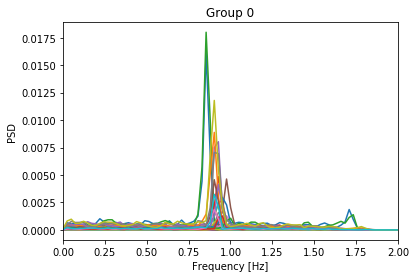

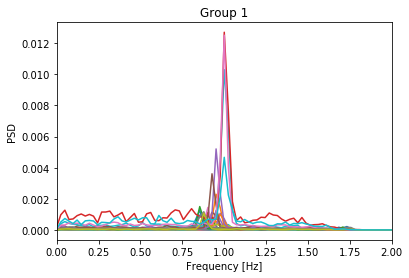

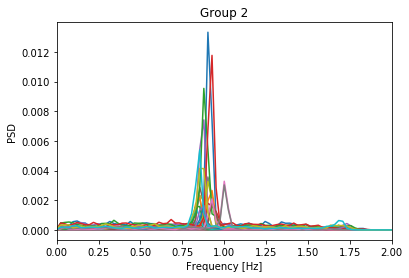

In [16]:
plt.plot(f, P0.T)
plt.xlim(0,2)
plt.title('Group 0')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()
plt.plot(f, P1.T)
plt.xlim(0,2)
plt.title('Group 1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()
plt.plot(f, P2.T)
plt.xlim(0,2)
plt.title('Group 2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

### PSD plot of the unfiltered signal

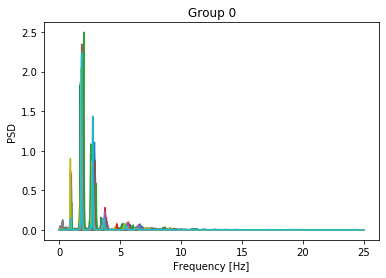

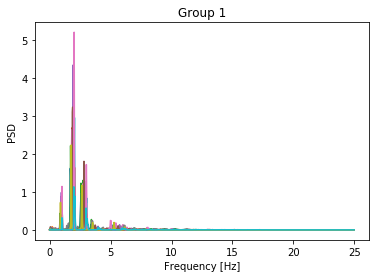

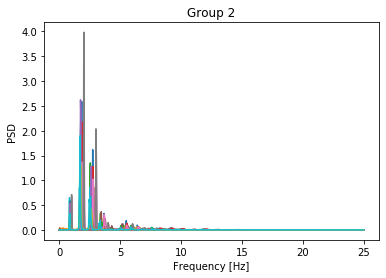

In [17]:
plt.plot(f, powerg0.T)
plt.title('Group 0')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()
plt.plot(f, powerg1.T)
plt.title('Group 1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()
plt.plot(f, powerg2.T)
plt.title('Group 2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

## 3. Estimator
Once we have studied several characteristics of the signals, we need to train our estimator. We've decided to use the fundamental frequency and the regularity index. 

We compute again the fundamental frequency and the regularity index with the methods we have used before, but this time with 'tto', that contains all of the signals unorganized. 

In [18]:
f0t=[]
ri=[]
for l in range(len(tto)): 

    señal=tto[l,:]
    pd,Pt = sg.welch(señal, window='hamming', fs=50,nperseg=2048)
    fd=pd[np.argmax(Pt)]
    
    RI=fd/sum(Pt[:int(1025*15/25)])
    #HIGH PASS filter
    b_, a_ = sg.butter(4, Wn =20/25, btype='highpass')
    señal = sg.filtfilt(b_,a_,señal) 

    #rectifier
    señal=np.abs(señal)

    #LOW PASS filter
    fir_filter = sg.firwin(256, 1.75, fs=50) 
    señal = sg.filtfilt(fir_filter,1,señal)
    #hallar f0
    f,P_ = sg.welch(señal, window='hamming', fs=50,nperseg=2048)
    P=P_[24:123]
    f0=np.argmax(P)+24 #index of first peak
    f0=f[f0] #get f0 
    p=0
    yn=max(P)
    f0t.append(f0)
    ri.append(RI)


f0t=np.array(f0t)
ri=np.array(ri)

In [19]:
X=f0t[:60],ri[:60]
X=np.transpose(X)

We train the estimator, where 'cat' is the list containing the group each signal belongs to

In [20]:
from sklearn.naive_bayes import GaussianNB

classif = GaussianNB(priors=[len(cig0)/len(cit),len(cig0)/len(cit),len(cig0)/len(cit)]) #priors of each group

classif.fit(X,cat)

GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

## 4. TEST
We follow the same procedure as before, but this time we read the file that contains the signals to be tested.

In [21]:
ci=[]

directory = 'Data/Test/'
for car in range(1,len(os.listdir(directory))+1):
    CI=list()
    directorio=directory+str(car)+"/"
    f = open(directorio+'CI.txt')
    CI1 = f.readlines()[1:]
    for i in range(len(CI1)):

        CI1[i]=CI1[i].replace("\n","").split()
        CI.append(np.array([float(CI1[i][0]),float(CI1[i][1]),float(CI1[i][2])]))


    ci.append(np.array(CI))

    
pd=[]

directory = 'Data/Test/'
for car in range(1,len(os.listdir(directory))+1):
    PD=[]
    directorio=directory+str(car)+"/"
    f = open(directorio+'PD.txt')
    PD1 = f.readlines()[1:]
    for i in range(len(PD1)):

        PD1[i]=PD1[i].replace("\n","").split()
        PD.append(np.array([float(PD1[i][0]),float(PD1[i][1]),float(PD1[i][2])]))


    pd.append(np.array(PD))

ci=np.array(ci)
pd=np.array(pd)
test=[]
testto=np.concatenate((ci,pd))
for i in range(len(testto)):
    test.append(np.sqrt(testto[i,:,0]**2 + testto[0,:,1]**2 + testto[i,:,2]**2))
test=np.array(test)

We obtain the fundamental frequency and the regularity index of the test signals

In [22]:
testf0t=[]
rit=[]
for l in range(len(test)): #from ci signals, axis x
    señal=test[l,:]
    f_,Pt = sg.welch(señal, window='hamming', fs=50,nperseg=2048)
    fd=f_[np.argmax(Pt)]
    #Regularity index
    RI=fd/sum(Pt[:int(1025*15/25)])
    
    #HIGH PASS filter
    b_, a_ = sg.butter(4, Wn =20/25, btype='highpass')
    señal = sg.filtfilt(b_,a_,señal) 

    #Rectifier
    señal=np.abs(señal)

    #LOW PASS filter
    fir_filter = sg.firwin(256, 1.75, fs=50) 
    señal = sg.filtfilt(fir_filter,1,señal)
    #Obtain fundamental frequency
    f,P_ = sg.welch(señal, window='hamming', fs=50,nperseg=4096)
    P=P_[24:125]
    xn=np.argmax(P)+24 #index of first peak
    f0=f[xn] #get f0 
    yn=max(P)
    testf0t.append(f0)
    rit.append(RI)
            
rit=np.array(rit)
testf0t=np.array(testf0t)

In [23]:
Y=testf0t[:30],rit[:30]
Y=np.transpose(Y)

In [24]:
tr = classif.predict(Y)
print(tr)

[1 0 2 0 2 2 0 0 2 0 0 2 2 0 0 2 2 0 0 2 0 2 2 2 2 2 2 2 1 2]


## 5. RESULTS AND CONCLUSION

We finally obtained a mark of 0.6 in kaggle applying this decision method. From the extaction of parameters and observations made during the project we could not find big differences between the groups 

||GROUP 0| GROUP 1| GROUP 2| 
|-|-|-|-|
|ri| 0.60±0.005| 0.59±0.0016|0.57±0.0008|
|f0 |0.92±0.001 |0.89±0.02|0.92±0.002|

We hardly observed differences between group 0 and 2 in all the project. This could reflect that there is no difference between the control group and placebo group.


## 6. BIBLIOGRAPHY

[1] *Estimation of Gait Stability based on Accelerometer Signals*
Hector Moncada-Gonzalez, Ruth M. Aguilar-Ponce, and J. Luis Tecpanecatl-Xihuitl
Universidad Autonoma de San Luis Potosi
<br /><br />
[2] *A Comparison of Pedestrian Dead-Reckoning*
Algorithms using a Low-Cost MEMS IMU
A.R. Jim´enez, F. Seco, C. Prieto and J. Guevara
Instituto de Automatica Industrial. Consejo Superior de Investigaciones Cientificas.
<br /><br />
[3] *Effects of Gait Strategy and Speed on Regularity of
Locomotion Assessed in Healthy Subjects Using a
Multi-Sensor Method*
Marco Rabuffetti, Giovanni Marco Scalera and Maurizio Ferrarin
<br /><br />
[4] *Estimation of gait cycle characteristics by trunk accelerometry*
Rolf Moe-Nilssen, Jorunn L. Helbostad
<br /><br />
[5] *Full Band Spectra Analysis of Gait Acceleration Signals for Peripheral Arterial Disease Patients*
Mihaela I. Chidean1, Óscar Barquero-Pérez, Rebeca Goya-Esteban, Alberto Sánchez Sixto, Blanca de la Cruz Torres, Jose Naranjo Orellana, Elena Sarabia Cachadiña and Antonio J. Caamaño